<a href="https://colab.research.google.com/github/sudeepmenon17/PytorchforNN/blob/main/NN_tensorflow_airfoil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install google-auth
from google.colab import auth
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Read the data set -  Airfoil S809
df1 = pd.read_csv("/content/drive/MyDrive/data_set1.csv")
df2 = pd.read_csv("/content/drive/MyDrive/data_set2.csv")
df3 = pd.read_csv("/content/drive/MyDrive/data_set3.csv")
df4 = pd.read_csv("/content/drive/MyDrive/data_set4.csv")

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredError
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from copy import deepcopy
from tensorflow.keras.callbacks import ModelCheckpoint
import logging



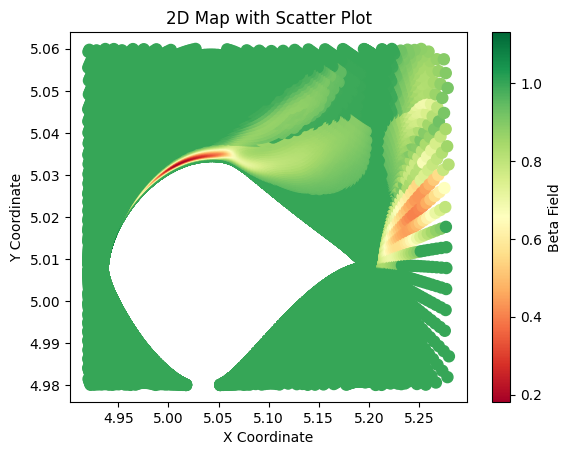

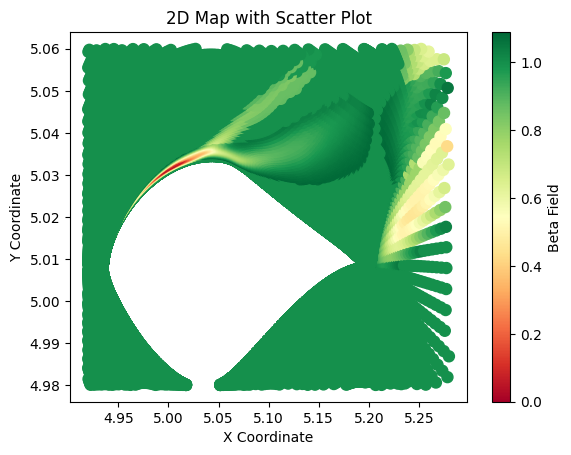

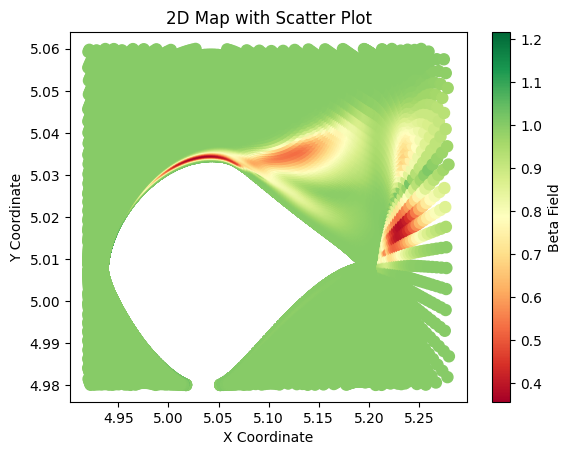

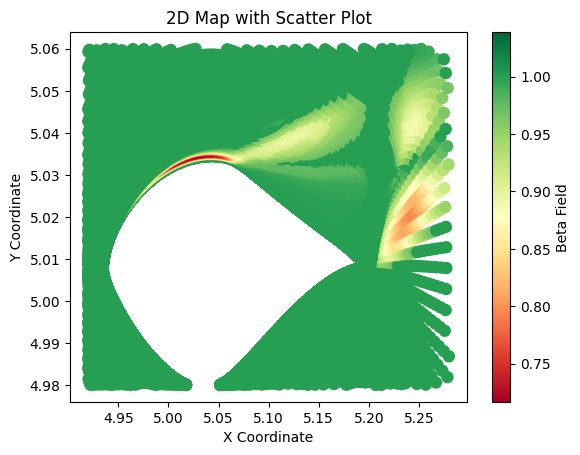

In [6]:
# Combine data
frames = [df1, df2, df3, df4]
ff = []

for item in frames:
  xc = np.array(item['x'])
  yc = np.array(item['y'])
  b = np.array(item['beta'])
  ff1 = np.array(item['feature1'])
  ff2 = np.array(item['feature2'])
  ff3 = np.array(item['feature3'])
  ff4 = np.array(item['feature4'])
  ff5 = np.array(item['feature5'])
  ff6 = np.array(item['feature6'])

  # Normalize x and y coordinates
  min_range = -5.0
  max_range = 5.0
  xc = (xc - np.min(xc)) * (max_range - min_range) / (np.max(xc) - np.min(xc))
  yc = (yc - np.min(yc)) * (max_range - min_range) / (np.max(yc) - np.min(yc))


  # #####################################################################
  # # Cleaning the beta field in the wake region
  # for k in range(len(xc)):
  #   if xc[k] >= 5.2 and xc[k] <= 5.3:
  #     if yc[k] >= 5.00 and yc[k] <= 4.96:
  #       b2.append(b[k])

  # for j in range(len(xc)):
  #   if xc[j] > 5.15 or yc[j]>5.04:
  #     b[j] = np.mean(b2)

  x1,y1,b1,f1,f2,f3,f4,f5,f6 = [[] for i in range(9)]
  # Filter data for the specified range of coordinates
  for i in range(len(xc)):
    if xc[i]>=4.92 and xc[i]<=5.28:
      if yc[i]>=4.98 and yc[i]<=5.06:
        x1.append(xc[i])
        y1.append(yc[i])
        b1.append(b[i])
        f1.append(ff1[i])  # /1600 - 0.5
        f2.append(ff2[i])  # /4200 - 0.5
        f3.append(ff3[i])  # /370000000 - 0.5
        f4.append(ff4[i])  # /10200 - 0.5
        f5.append(ff5[i])  # /30000 - 0.5
        f6.append(ff6[i])  # /1.2 - 0.5

  modified_data = {
  'x': np.array(x1),
  'y': np.array(y1),
  'beta': np.array(b1),
  'feature1': np.array(f1),
  'feature2': np.array(f2),
  'feature3': np.array(f3),
  'feature4': np.array(f4),
  'feature5': np.array(f5),
  'feature6': np.array(f6)
  }


  ff.append(pd.DataFrame(modified_data))

  # # #####################################################################
  # # Plotting cleaned data
  # ################################
  # nx = []
  # ny = []
  # nb = []


  # # Filter data for the specified range of coordinates
  # for i in range(len(xc)):
  #   if xc[i]>=4.9 and xc[i]<=5.3:
  #     if yc[i]>=4.925 and yc[i]<=5.075:
  #       nx.append(xc[i])
  #       ny.append(yc[i])
  #       nb.append(b[i])

  # Create a scatter plot
  plt.scatter(x1, y1, c=b1,  cmap= 'RdYlGn',alpha=1, marker='.',s=250)
  plt.colorbar(label='Beta Field')
  plt.xlabel('X Coordinate')
  plt.ylabel('Y Coordinate')
  plt.title('2D Map with Scatter Plot')
  plt.show()
###############################################################################

df = pd.concat(ff)


# # Data for beta>1.02 or beta<0.98
# df_filtered = df[(df['beta'] < 0.970) | (df['beta'] > 1.03)]

df_filtered = df[df['beta'] != 1.0]

# df_filtered = df



<Axes: xlabel='feature3', ylabel='Density'>

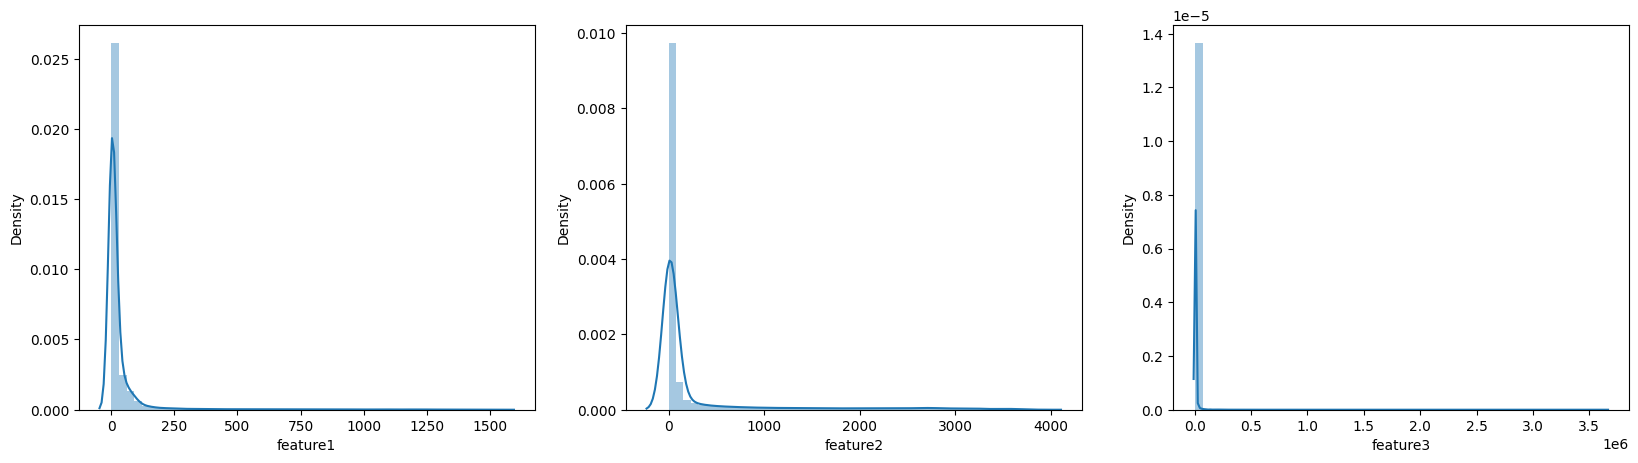

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')




# Preprocess Features
df1 = df_filtered.drop(['x','y','beta'],axis=1)
df2 = df_filtered.drop(['x','y','feature1','feature2','feature3','feature4','feature5','feature6'],axis=1)



## Features with a few outliers and very large range are --> 3,4 and 5
# df1 = df1[df1['feature2'] < 100]
# df1 = df1[df1['feature3'] < 100.0]
# df1 = df1[(df1['feature5'] > 0) & (df1['feature5'] < 60000.0)]

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(df1['feature1'])
plt.subplot(1,3,2)
sns.distplot(df1['feature2'])
plt.subplot(1,3,3)
sns.distplot(df1['feature3'])

<Axes: xlabel='feature6', ylabel='Density'>

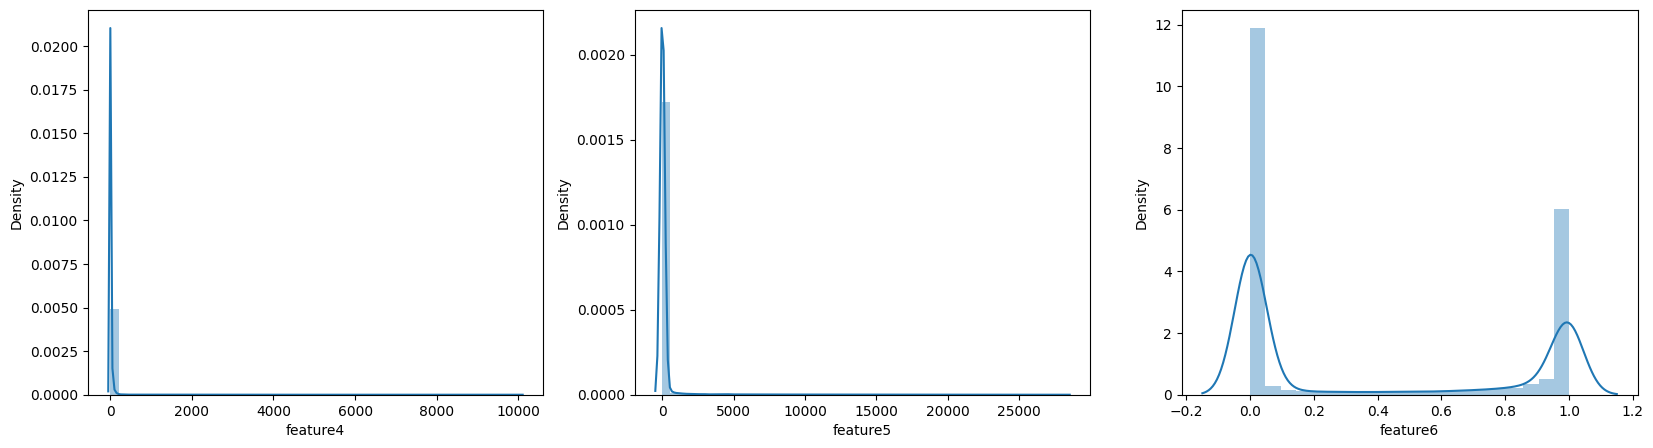

In [8]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(df1['feature4'])
plt.subplot(1,3,2)
sns.distplot(df1['feature5'])
plt.subplot(1,3,3)
sns.distplot(df1['feature6'])

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler





# Fill missing values with the mean
df1 = df1.fillna(df1.mean())

In [10]:
#  Standardization
# standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
# transformer = Normalizer()
scaler = RobustScaler(with_centering=False)

# Features
# X = min_max_scaler.fit_transform(df1)
X = df1.values

# # Target
# # y = df_filtered['beta'].values
# # y = standard_scaler.fit_transform(df2)
# y = min_max_scaler.fit_transform(df2)
# # y = scaler.fit_transform(df2)
y = df2.values

In [11]:
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

# # # Load the data into a pandas DataFrame
# # df = pd.read_excel(r'C:\Users\adhar\Desktop\Ni_Fatigue_mod.xlsx')

# # Separate features and target variable
# X = df.drop('log10(da/dN)', axis=1)  # Features
# y = df['log10(da/dN)']                # Target variable

# # Get the feature names before converting X to a NumPy array
# feature_names = X.columns.tolist()

# print("Feature Names:", feature_names)

# # Convert X to a NumPy array
# X = X.values

# # Convert y to a NumPy array
# y = y.values

# Split the data into training, validation, and test sets
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)

# # Delete temporary variables
# del X_, y_

n = X_train.shape[1]    # Number of features

for i in range(n):
    print(f"Feature {i+1} Max, Min pre normalization: {np.max(X_train[:, i]): 0.2f}, {np.min(X_train[:, i]): 0.2f}")

norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X_train)  # learns mean, variance
X_train_n = norm_l(X_train)
# X_train_n = X_train



for i in range(n):
    print(f"Feature {i+1} Max, Min post normalization: {np.max(X_train_n[:, i]): 0.2f}, "
          f"{np.min(X_train_n[:, i]): 0.2f}")
    # X_train_n[:,i] = X_train_n[:,i]/(np.max(X_train_n[:, i]))
    # X_test_n[:,i] = X_test_n[:,i]/(np.max(X_train_n[:, i]))
    # X_cv_n[:,i] = X_cv_n[:,i]/(np.max(X_train_n[:, i]))
X_cv_n = norm_l(X_cv)
X_test_n = norm_l(X_test)

# X_cv_n = X_cv
# X_test_n = X_test

# Define a ModelCheckpoint callback to save the model
checkpoint_filepath = r'/content/drive/MyDrive/best_model.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

# Define the main model without any regularization
# main_model = Sequential([
#     tf.keras.Input(shape=(n,)),
#     Dense(units=9, activation='relu'),
#     Dropout(0.10),
#     Dense(units=1200, activation='relu'),
#     Dropout(0.10),
#     Dense(units=1, activation='linear')
# ])




Feature 1 Max, Min pre normalization:  1544.98,  0.00
Feature 2 Max, Min pre normalization:  3879.51,  0.01
Feature 3 Max, Min pre normalization:  3656307.40,  0.00
Feature 4 Max, Min pre normalization:  9756.68,  0.00
Feature 5 Max, Min pre normalization:  27510.53, -1.52
Feature 6 Max, Min pre normalization:  1.00,  0.00
Feature 1 Max, Min post normalization:  10.91, -0.29
Feature 2 Max, Min post normalization:  5.11, -0.39
Feature 3 Max, Min post normalization:  104.92, -0.05
Feature 4 Max, Min post normalization:  72.86, -0.10
Feature 5 Max, Min post normalization:  18.73, -0.15
Feature 6 Max, Min post normalization:  1.37, -0.81


In [ ]:
# drop_layer_1 = [0.05, 0.10, 0.15, 0.20, 0.25]
# drop_layer_2 = [0.05, 0.10, 0.15, 0.20, 0.25]

# units_layer_1 = [100, 200, 300, 400, 500]
# units_layer_2 = [100, 200, 300, 400, 500]



drop_layer_1 = [0.05, 0.10, 0.15]#, 0.20, 0.25]
drop_layer_2 = [0.05, 0.10, 0.15]#, 0.20, 0.25]

units_layer_1 = [100, 200, 300]#, 400, 500]
units_layer_2 = [100, 200, 300]#, 400, 500]

min_loss = 1000.0
par_loss_matrix = []

for i in drop_layer_1:
    for j in drop_layer_2:
        for k in units_layer_1:
            for l in units_layer_2:
                # Compile and train the model
                # model = deepcopy(main_model)

                model = Sequential([
                        tf.keras.Input(shape=(n,)),
                        Dense(units=k, activation='sigmoid'),
                        Dropout(i),
                        Dense(units=l, activation='sigmoid'),
                        Dropout(j),
                        Dense(units=1, activation='linear')
                    ])

                model.compile(loss=MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))

                history = model.fit(X_train_n, y_train, epochs=100, verbose=1, validation_data=(X_cv_n, y_cv),
                                    callbacks=[model_checkpoint_callback])


                min_val_loss_epoch = np.argmin(history.history['val_loss'])
                min_val_loss = history.history['val_loss'][min_val_loss_epoch]
                print("Epoch with minimum validation loss:", min_val_loss_epoch)
                print("Minimum validation loss:", min_val_loss)

                par_loss_matrix.append([i, j, k, l, min_val_loss])

                if min_val_loss < min_loss:
                    min_loss = min_val_loss
                    hp_set = [i, j, k, l]
                    # Load the best model saved during training
                    best_model = tf.keras.models.load_model(checkpoint_filepath)


print("Best hyperparameters:", hp_set)
print("Minimum validation loss:", min_loss)
print("Hyperparameter matrix:", par_loss_matrix)


model = Sequential([
    tf.keras.Input(shape=(n,)),
    Dense(units=hp_set[2], activation='relu'),
    Dropout(hp_set[0]),
    Dense(units=hp_set[3], activation='relu'),
    Dropout(hp_set[1]),
    Dense(units=1, activation='linear')
])

model.compile(loss=MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))

history = model.fit(X_train_n, y_train, epochs=100, verbose=1, validation_data=(X_cv_n, y_cv),
                    callbacks=[model_checkpoint_callback])


plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training loss', linestyle='-', linewidth=1.5)
plt.plot(history.history['val_loss'], label='Validation loss (training data)', linestyle='--', linewidth=1.5)
plt.scatter(np.argmin(history.history['val_loss']) + 1, np.min(history.history['val_loss']),
            color='red', label='Min Val Loss Epoch', s=100)
plt.title('Model Loss vs Epoch', fontsize=12, fontname='Times New Roman')
plt.ylabel('Loss', fontsize=12, fontname='Times New Roman')
plt.xlabel('Epoch', fontsize=12, fontname='Times New Roman')
plt.legend(loc='upper right', fontsize=16)
plt.grid(True)
plt.savefig(r'/content/drive/MyDrive/model_loss_plot.png', dpi=300)  # Save as PNG with 300 dpi
plt.show()
# Comparing model prediction with y_test
predictions_test = best_model.predict(X_test_n)

# Evaluate the best_model on the test data
test_loss = best_model.evaluate(X_test_n, y_test)
test_rmse = np.sqrt(test_loss)
print("Test RMSE:", test_rmse)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_test, marker='x', c='r', label="Data Points")
plt.ylabel('y_test', fontsize=12, fontname='Times New Roman')
plt.xlabel('y_predict', fontsize=12, fontname='Times New Roman')
plt.legend(loc='upper left', fontsize=16)
plt.grid(True)
plt.show()
plt.savefig(r'/content/drive/MyDrive/model_test.png', dpi=300)  # Save as PNG with 300 dpi


#

Epoch 1/100
1205/1213 [============================>.] - ETA: 0s - loss: 0.0211
Epoch 1: val_loss improved from inf to 0.00993, saving model to /content/drive/MyDrive/best_model.keras
1213/1213 [==============================] - 9s 5ms/step - loss: 0.0210 - val_loss: 0.0099
Epoch 2/100
1197/1213 [============================>.] - ETA: 0s - loss: 0.0097
Epoch 2: val_loss improved from 0.00993 to 0.00885, saving model to /content/drive/MyDrive/best_model.keras
1213/1213 [==============================] - 5s 4ms/step - loss: 0.0097 - val_loss: 0.0088
Epoch 3/100
1210/1213 [============================>.] - ETA: 0s - loss: 0.0085
Epoch 3: val_loss improved from 0.00885 to 0.00808, saving model to /content/drive/MyDrive/best_model.keras
1213/1213 [==============================] - 6s 5ms/step - loss: 0.0085 - val_loss: 0.0081
Epoch 4/100
1202/1213 [============================>.] - ETA: 0s - loss: 0.0081
Epoch 4: val_loss did not improve from 0.00808
1213/1213 [=============================